# **New York City Yellow Taxi Data**

  **Name: Aakash Chaudhary**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [59]:
# Import warnings


import warnings
warnings.filterwarnings('ignore')


In [60]:
# Import the libraries you will be using for analysis



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import geopandas as gpdS
import os
from tqdm import tqdm

# Set seaborn style
sns.set_style("whitegrid")

In [61]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [62]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

# Load one Parquet file (January 2023 yellow taxi data)
df_jan = pd.read_parquet('Data/yellow_tripdata_2023-01.parquet')
df_jan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [63]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data


# Set the path to the folder containing all 12 monthly files
data_folder = 'Data/'
file_list = sorted([f for f in os.listdir(data_folder) if f.endswith('.parquet')])

# Final DataFrame to store sampled data from all months
final_sampled_df = pd.DataFrame()

# Loop through each file (one month at a time)
for file_name in tqdm(file_list, desc="Sampling Monthly Files"):
    try:
        file_path = os.path.join(data_folder, file_name)

        # Load one month's data
        df_month = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime type
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        df_month['pickup_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['pickup_hour'] = df_month['tpep_pickup_datetime'].dt.hour

        sampled_month = pd.DataFrame()

        # Iterate by date first, then by hour
        for date in df_month['pickup_date'].unique():
            df_date = df_month[df_month['pickup_date'] == date]

            for hour in range(24):
                hour_data = df_date[df_date['pickup_hour'] == hour]

                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_month = pd.concat([sampled_month, sample], ignore_index=True)

        # Append sampled data of this month to final dataframe
        final_sampled_df = pd.concat([final_sampled_df, sampled_month], ignore_index=True)

        print(f"✓ Sampled from {file_name}: {len(sampled_month)} rows added")

    except Exception as e:
        print(f"✗ Error processing {file_name}: {e}")

print(f"\nTotal sampled rows from all months: {len(final_sampled_df)}")


Sampling Monthly Files:   8%|▊         | 1/12 [00:12<02:22, 12.92s/it]

✓ Sampled from yellow_tripdata_2023-01.parquet: 153336 rows added


Sampling Monthly Files:  17%|█▋        | 2/12 [00:24<02:00, 12.03s/it]

✓ Sampled from yellow_tripdata_2023-02.parquet: 145690 rows added


Sampling Monthly Files:  25%|██▌       | 3/12 [00:38<01:55, 12.81s/it]

✓ Sampled from yellow_tripdata_2023-03.parquet: 170184 rows added


Sampling Monthly Files:  33%|███▎      | 4/12 [00:50<01:40, 12.52s/it]

✓ Sampled from yellow_tripdata_2023-04.parquet: 164410 rows added


Sampling Monthly Files:  42%|████▏     | 5/12 [01:06<01:37, 13.89s/it]

✓ Sampled from yellow_tripdata_2023-05.parquet: 175683 rows added


Sampling Monthly Files:  50%|█████     | 6/12 [01:18<01:20, 13.40s/it]

✓ Sampled from yellow_tripdata_2023-06.parquet: 165362 rows added


Sampling Monthly Files:  58%|█████▊    | 7/12 [01:29<01:03, 12.61s/it]

✓ Sampled from yellow_tripdata_2023-07.parquet: 145348 rows added


Sampling Monthly Files:  67%|██████▋   | 8/12 [01:40<00:47, 11.92s/it]

✓ Sampled from yellow_tripdata_2023-08.parquet: 141219 rows added


Sampling Monthly Files:  75%|███████▌  | 9/12 [01:49<00:33, 11.19s/it]

✓ Sampled from yellow_tripdata_2023-09.parquet: 142340 rows added


Sampling Monthly Files:  83%|████████▎ | 10/12 [02:02<00:23, 11.50s/it]

✓ Sampled from yellow_tripdata_2023-10.parquet: 176117 rows added


Sampling Monthly Files:  92%|█████████▏| 11/12 [02:14<00:11, 11.77s/it]

✓ Sampled from yellow_tripdata_2023-11.parquet: 166986 rows added


Sampling Monthly Files: 100%|██████████| 12/12 [02:27<00:00, 12.28s/it]

✓ Sampled from yellow_tripdata_2023-12.parquet: 168836 rows added

Total sampled rows from all months: 1915511


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [66]:
# Store the df in csv/parquet
# df.to_parquet('')

# Check total number of rows in the final sampled DataFrame
print("Final sampled data shape:", final_sampled_df.shape)

# Save as Parquet file (efficient for big data & faster I/O)
final_sampled_df.to_parquet("sampled_nyc_taxi_data.parquet", index=False)
print("Saved as 'sampled_nyc_taxi_data.parquet'")

# Also save as CSV (in case required for external tools or submission)
final_sampled_df.to_csv("sampled_nyc_taxi_data.csv", index=False)
print("Saved as 'sampled_nyc_taxi_data.csv'")

df = pd.read_parquet('sampled_nyc_taxi_data.parquet')


Final sampled data shape: (1915511, 22)
Saved as 'sampled_nyc_taxi_data.parquet'
Saved as 'sampled_nyc_taxi_data.csv'


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [67]:
# Load the new data file
df = pd.read_parquet("sampled_nyc_taxi_data.parquet")



In [68]:
# df.head()
# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
1         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
2         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
3         2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   
4         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.49         1.0                  N           239           238   
1           0.75         1.0                  N            45           148   
2           2.90         1.0                  N           142           170   
3           2.50         1.0                  N            43           161   
4          20.37         2.0                  N           132           140   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.88          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5        4.80          0.00   
3             1  ...      0.5        7.25          0.00   
4             1  ...      0.5       12.00          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         11.28                   2.5          0.0   
1                    1.0         12.90                   2.5          0.0   
2                    1.0         28.90                   2.5          0.0   
3                    1.0         36.25                   2.5          0.0   
4                    1.0         92.55                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [69]:
# df.info()
# Display the structure of the DataFrame
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [70]:
# Fix the index and drop any columns that are not needed

# Reset index (if any) to ensure it's clean
df.reset_index(drop=True, inplace=True)

# Show all column names to decide which ones are unnecessary
print("Columns in dataset:")
print(df.columns.tolist())

# Drop columns that are not needed for analysis
df.drop(columns=['pickup_date', 'pickup_hour'], inplace=True, errors='ignore')

print("Index fixed and unnecessary columns dropped.")



Columns in dataset:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour', 'Airport_fee']
Index fixed and unnecessary columns dropped.


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [71]:
# Combine the two airport fee columns

# Find any duplicate or similarly named airport fee columns
[df_col for df_col in df.columns if 'airport' in df_col.lower()]

# Combine both airport fee columns into one (sum, if not null)
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee_combined'] = df[['Airport_fee', 'airport_fee']].sum(axis=1, skipna=True)

    # Drop the original two columns
    df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

    # Rename the combined column
    df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

    print("Combined the two airport fee columns into 'airport_fee'.")
else:
    print("No duplicate airport fee columns found.")



Combined the two airport fee columns into 'airport_fee'.


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [72]:
# check where values of fare amount are negative



Did you notice something different in the `RatecodeID` column for above records?

In [73]:
# Analyse RatecodeID for the negative fare amounts

# Check rows where fare amount is negative
neg_fare_df = df[df['fare_amount'] < 0]

In [74]:
# Find which columns have negative values

# Look at RatecodeID in those rows
print("RatecodeID distribution for negative fares:")
print(neg_fare_df['RatecodeID'].value_counts())

RatecodeID distribution for negative fares:
RatecodeID
1.0    16721
2.0     1324
5.0      369
3.0      223
4.0       88
Name: count, dtype: int64


In [75]:
# fix these negative values

# Option: Remove rows with negative fare (or set them to NaN)
df = df[df['fare_amount'] >= 0]

print("Negative fare_amount values removed.")

Negative fare_amount values removed.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [76]:
# Find the proportion of missing values in each column

# Proportion of missing (null) values in each column
missing_proportion = df.isnull().mean().sort_values(ascending=False)

print("Proportion of missing values in each column:")
print(missing_proportion[missing_proportion > 0])


Proportion of missing values in each column:
store_and_fwd_flag      0.034174
RatecodeID              0.034174
passenger_count         0.034174
congestion_surcharge    0.034174
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [77]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

null_passenger = df[df['passenger_count'].isnull()]
print("Rows with null 'passenger_count':", len(null_passenger))

# Impute NaN in passenger_count with mode (most common value)
mode_passenger = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(mode_passenger, inplace=True)

# Now handle zero values in passenger_count
zero_passenger = df[df['passenger_count'] == 0]
print("Rows with zero 'passenger_count':", len(zero_passenger))

# Replace zero passenger_count with mode as well (optional)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_passenger

print("Handled missing and zero values in 'passenger_count'")

Rows with null 'passenger_count': 64809
Rows with zero 'passenger_count': 29587
Handled missing and zero values in 'passenger_count'


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [78]:
# Fix missing values in 'RatecodeID'

# Count missing RatecodeID
missing_ratecode = df['RatecodeID'].isnull().sum()
print(f"Missing RatecodeID values: {missing_ratecode}")

# Fill with mode
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)

print("Missing values in 'RatecodeID' filled with mode.")


Missing RatecodeID values: 64809
Missing values in 'RatecodeID' filled with mode.


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [79]:
# handle null values in congestion_surcharge

# Check missing in congestion_surcharge
missing_cong = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_cong}")

# Fill with median (surcharge can vary, so median is safer than mean)
median_cong = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_cong, inplace=True)

# Check for any remaining missing values
remaining_missing = df.isnull().sum()
print("Remaining missing values in dataset:")
print(remaining_missing[remaining_missing > 0])



Missing values in 'congestion_surcharge': 64809
Remaining missing values in dataset:
store_and_fwd_flag    64809
dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [80]:
# Handle any remaining missing values
# Fill remaining numeric columns with median (fallback)
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("Remaining missing numeric values handled.")



Remaining missing numeric values handled.


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [81]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Basic statistics of numeric columns
print("Statistical summary:")
display(df.describe())

# Check unique values in key columns
print("Unique payment types:", df['payment_type'].unique())
print("Max trip_distance:", df['trip_distance'].max())
print("Max fare_amount:", df['fare_amount'].max())
print("Passenger count distribution:")
print(df['passenger_count'].value_counts())



Statistical summary:


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896455e+06                     1896455                     1896455   
mean   1.732999e+00  2023-07-02 20:16:50.636259  2023-07-02 20:34:15.872378   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:21:39.500000  2023-04-02 16:44:11.500000   
50%    2.000000e+00         2023-06-27 16:11:15         2023-06-27 16:28:48   
75%    2.000000e+00         2023-10-06 19:44:48  2023-10-06 20:03:12.500000   
max    6.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.473474e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896455e+06   1.896455e+06  1.896455e+06  1.896455e+06   
mean      1.371917e+00   4.226601e+00  1.609070e+00  1.652638e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.040000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.590176e+05  9.900000e+01  2.650000e+02   
std       8.635790e-01   2.655387e+02  7.236592e+00  6.401744e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896455e+06  1.896455e+06  1.896455e+06  1.896455e+06  1.896455e+06   
mean   1.639840e+02  1.164195e+00  1.985269e+01  1.587793e+00  4.951966e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -5.000000e+00 -5.000000e-01   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  9.046000e+02  2.080000e+01  5.750000e+00   
std    6.986187e+01  5.090959e-01  1.832143e+01  1.828294e+00  4.956951e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896455e+06  1.896455e+06           1.896455e+06  1.896455e+06   
mean   3.548448e+00  5.953412e-01           9.989644e-01  2.891444e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -8.250000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    4.111000e+02  1.047500e+02           1.000000e+00  9.061000e+02   
std    4.051366e+00  2.184648e+00           3.175292e-02  2.287319e+01   

       congestion_surcharge   airport_fee  
count          1.896455e+06  1.896455e+06  
mean           2.312952e+00  1.380256e-01  
min           -2.500000e+00 -1.750000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.581180e-01  4.575898e-01

Unique payment types: [1 2 0 3 4]
Max trip_distance: 159017.6
Max fare_amount: 904.6
Passenger count distribution:
passenger_count
1.0    1471737
2.0     277730
3.0      68839
4.0      38601
5.0      23654
6.0      15881
8.0         10
9.0          2
7.0          1
Name: count, dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [82]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("Removed trips with passenger_count > 6")


Removed trips with passenger_count > 6


In [83]:
# Continue with outlier handling
condition1 = (df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)
print("Rows where trip_distance is ~0 and fare > 300:", condition1.sum())
df = df[~condition1]
print("Removed trips with near-zero distance and high fare")

cols_needed = ['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']
if all(col in df.columns for col in cols_needed):
    condition2 = (
        (df['trip_distance'] == 0) &
        (df['fare_amount'] == 0) &
        (df['PULocationID'] != df['DOLocationID'])
    )
    print("Rows with 0 fare & distance but different zones:", condition2.sum())
    df = df[~condition2]
    print("Removed invalid trips with 0 fare & distance between different zones")

condition3 = df['trip_distance'] > 250
print("Rows with trip_distance > 250 miles:", condition3.sum())
df = df[~condition3]
print("Removed unrealistic long trips")

condition4 = df['payment_type'] == 0
print("Rows with undefined payment_type == 0:", condition4.sum())
df = df[~condition4]
print("Removed trips with invalid payment_type")

print("Remaining dataset shape after outlier removal:", df.shape)



Rows where trip_distance is ~0 and fare > 300: 51
Removed trips with near-zero distance and high fare
Rows with 0 fare & distance but different zones: 75
Removed invalid trips with 0 fare & distance between different zones
Rows with trip_distance > 250 miles: 45
Removed unrealistic long trips
Rows with undefined payment_type == 0: 64780
Removed trips with invalid payment_type
Remaining dataset shape after outlier removal: (1831491, 19)


In [84]:
# Do any columns need standardising?

#Usually not needed for EDA, but for modeling

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [85]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

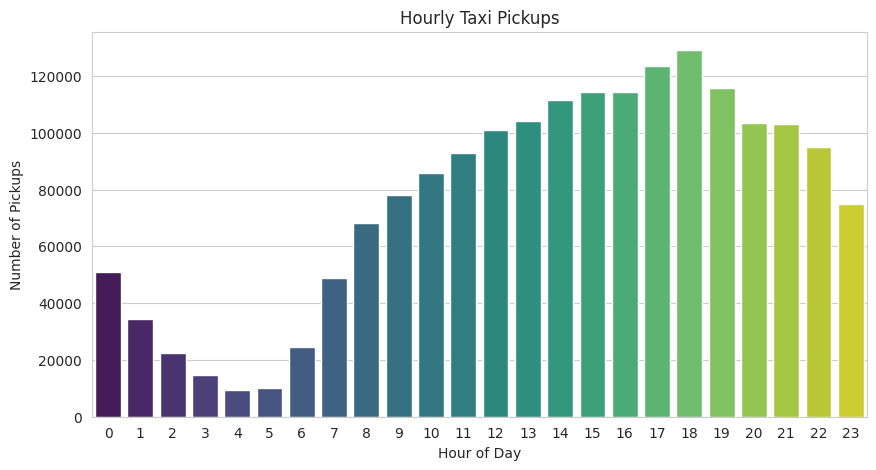

In [86]:
# Find and show the hourly trends in taxi pickups

# Convert pickup datetime to datetime if not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract time-based features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Hourly Trends
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.show()


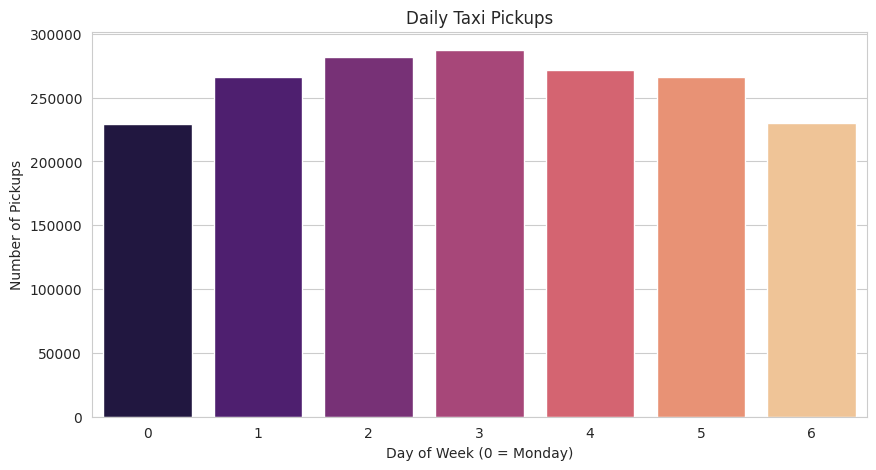

In [87]:
# Find and show the daily trends in taxi pickups (days of the week)


# Day of Week Trends
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_dayofweek', data=df, palette='magma')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Number of Pickups')
plt.show()


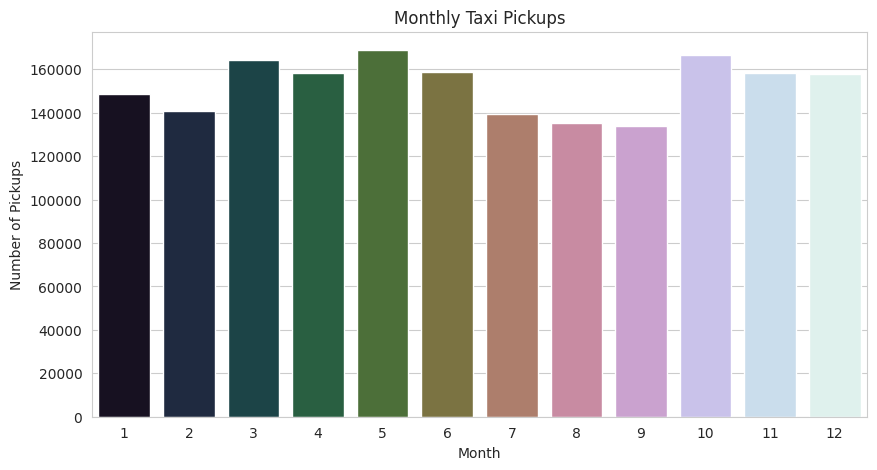

In [88]:
# Show the monthly trends in pickups

# Monthly Trends
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_month', data=df, palette='cubehelix')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

fare_amount — Zero values: 579, Negative values: 0
tip_amount — Zero values: 409836, Negative values: 0
total_amount — Zero values: 256, Negative values: 103
trip_distance — Zero values: 23072, Negative values: 0
Original dataset size: 1831491
Filtered (non-zero) dataset size: 1413318


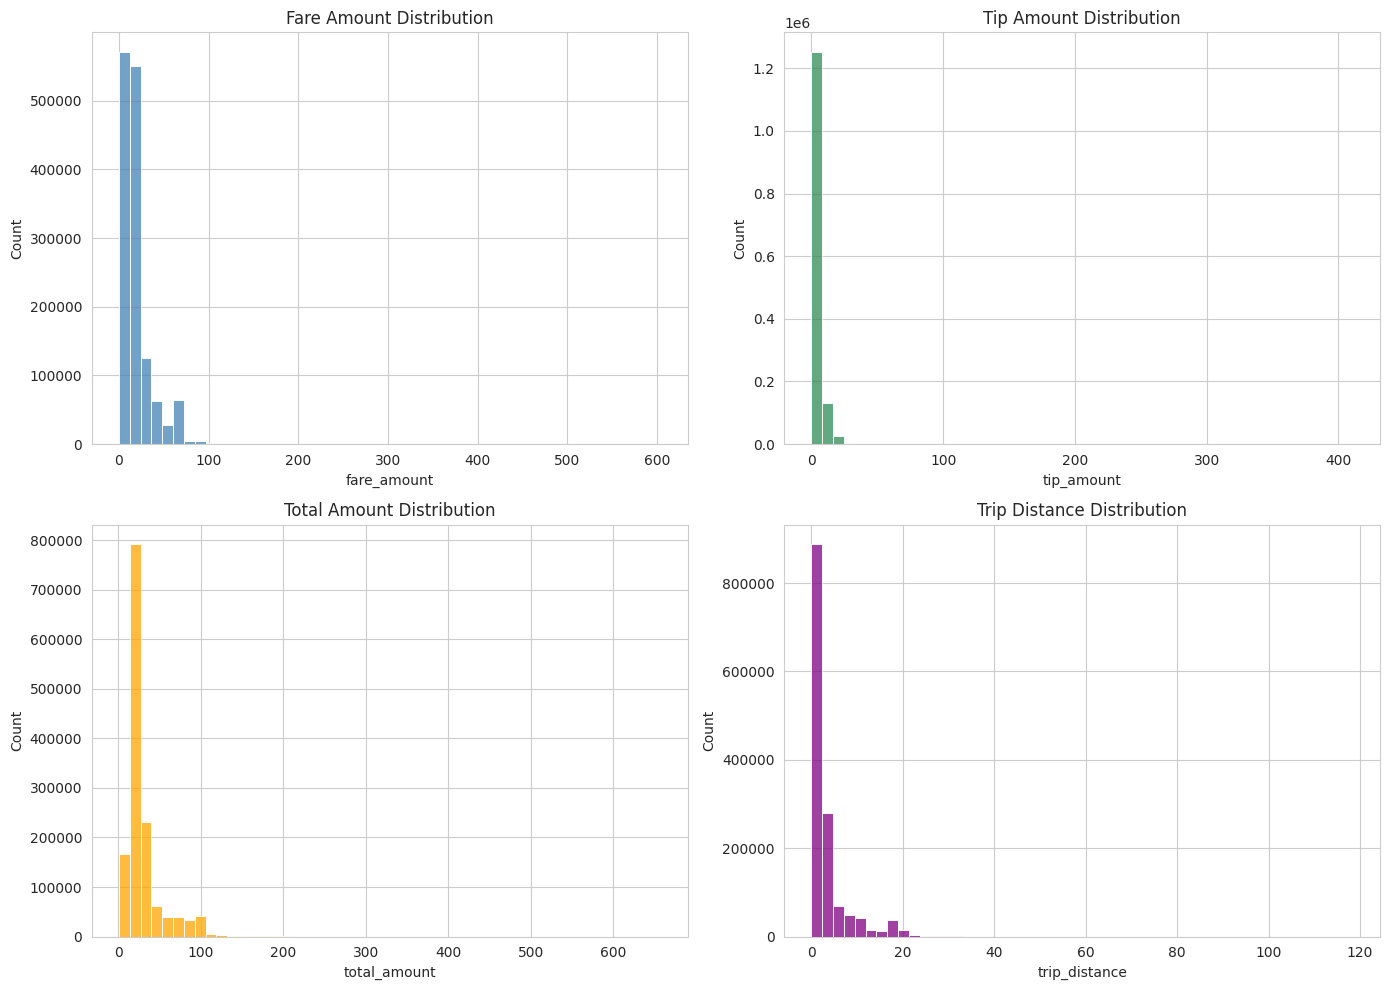

In [89]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} — Zero values: {zero_count}, Negative values: {negative_count}")
# Create filtered DataFrame for financial analysis
df_financial = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered (non-zero) dataset size: {df_financial.shape[0]}")

# Distribution plots for financial features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_financial['fare_amount'], bins=50, ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Fare Amount Distribution')

sns.histplot(df_financial['tip_amount'], bins=50, ax=axes[0,1], color='seagreen')
axes[0,1].set_title('Tip Amount Distribution')

sns.histplot(df_financial['total_amount'], bins=50, ax=axes[1,0], color='orange')
axes[1,0].set_title('Total Amount Distribution')

sns.histplot(df_financial['trip_distance'], bins=50, ax=axes[1,1], color='purple')
axes[1,1].set_title('Trip Distance Distribution')

plt.tight_layout()
plt.show()



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [90]:
# Create a df with non zero entries for the selected parameters.

# Filter out rows with zero or negative values in financial parameters
df_nonzero = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

# Print shape comparison
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered (non-zero) dataset size: {df_nonzero.shape[0]}")


Original dataset size: 1831491
Filtered (non-zero) dataset size: 1413318


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

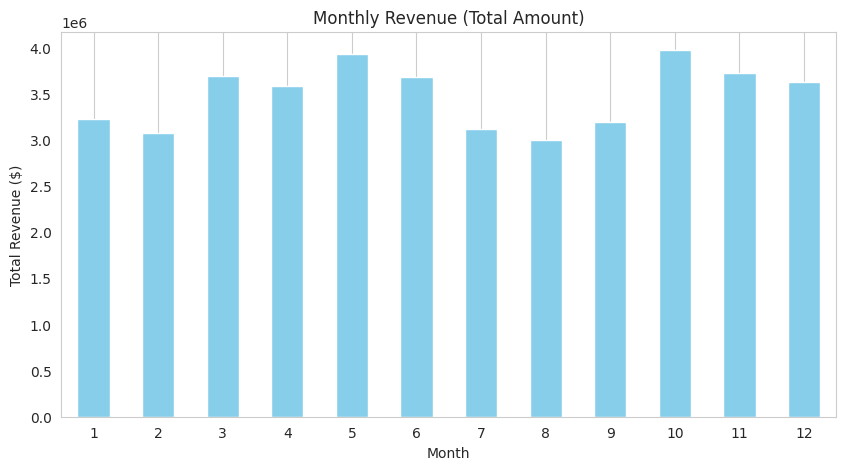

Monthly Revenue ($):
pickup_month
1     3222608.83
2     3076653.97
3     3694749.29
4     3583081.37
5     3925907.64
6     3677629.13
7     3111402.35
8     3002900.39
9     3192778.20
10    3971880.68
11    3719468.74
12    3624382.06
Name: total_amount, dtype: float64


In [91]:
# Group data by month and analyse monthly revenue
# Ensure datetime column is in datetime format
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])

# Extract month
df_nonzero['pickup_month'] = df_nonzero['tpep_pickup_datetime'].dt.month

# Group by month and sum total_amount
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum().sort_index()

# Plot monthly revenue
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Monthly Revenue (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Show values
print("Monthly Revenue ($):")
print(monthly_revenue.round(2))



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

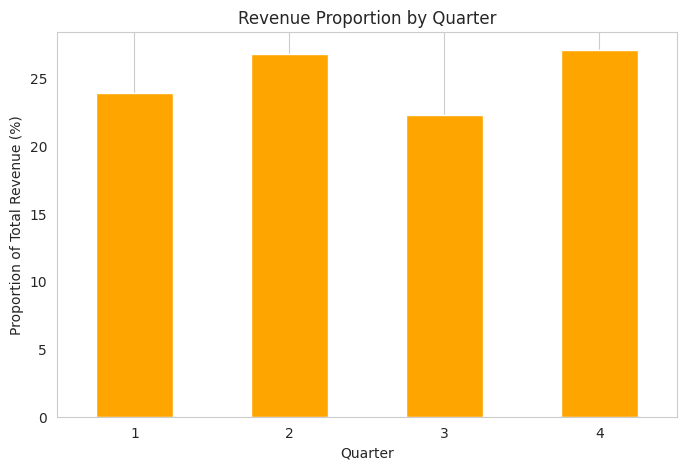

Quarterly Revenue Proportion (%):
pickup_quarter
1    23.91
2    26.76
3    22.26
4    27.07
Name: total_amount, dtype: float64


In [92]:
# Calculate proportion of each quarter
# Extract quarter
df_nonzero['pickup_quarter'] = df_nonzero['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum total_amount
quarterly_revenue = df_nonzero.groupby('pickup_quarter')['total_amount'].sum().sort_index()

# Calculate proportion of each quarter
revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Plot
plt.figure(figsize=(8,5))
revenue_proportion.plot(kind='bar', color='orange')
plt.title("Revenue Proportion by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Quarterly Revenue Proportion (%):")
print(revenue_proportion.round(2))



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

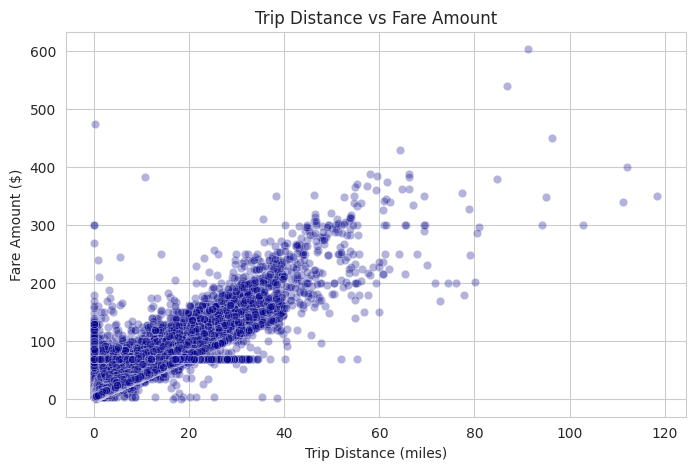

Correlation between trip_distance and fare_amount: 0.951


In [93]:
# Show how trip fare is affected by distance

# Scatter plot of trip_distance vs fare_amount
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_nonzero,
    x='trip_distance',
    y='fare_amount',
    alpha=0.3,
    color='darkblue'
)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

# Correlation of trip_distance and fare_amount
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.3f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

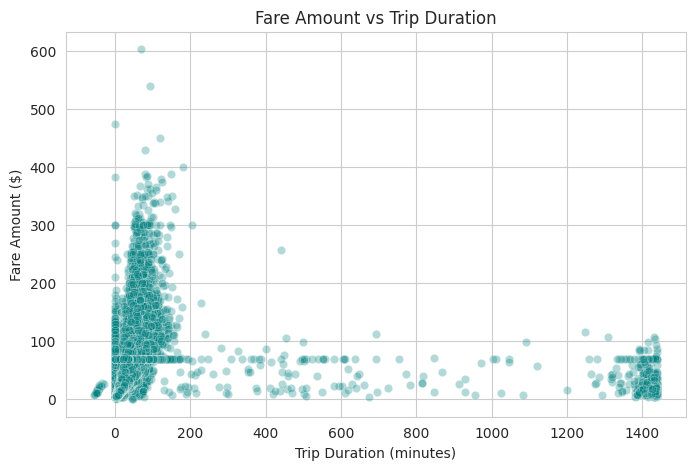

Correlation between fare_amount and trip_duration: 0.321


In [94]:
# Show relationship between fare and trip duration
# Ensure datetime columns are datetime type
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_nonzero,
    x='trip_duration',
    y='fare_amount',
    alpha=0.3,
    color='teal'
)
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

# Correlation
corr_duration = df_nonzero['trip_duration'].corr(df_nonzero['fare_amount'])
print(f"Correlation between fare_amount and trip_duration: {corr_duration:.3f}")



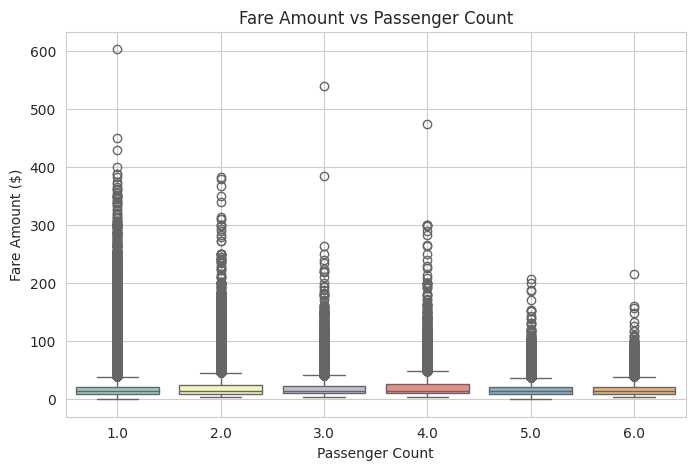

Correlation between fare_amount and passenger_count: 0.038


In [95]:
# Show relationship between fare and number of passengers

# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_nonzero,
    x='passenger_count',
    y='fare_amount',
    palette='Set3'
)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

corr_passenger = df_nonzero['passenger_count'].corr(df_nonzero['fare_amount'])
print(f"Correlation between fare_amount and passenger_count: {corr_passenger:.3f}")



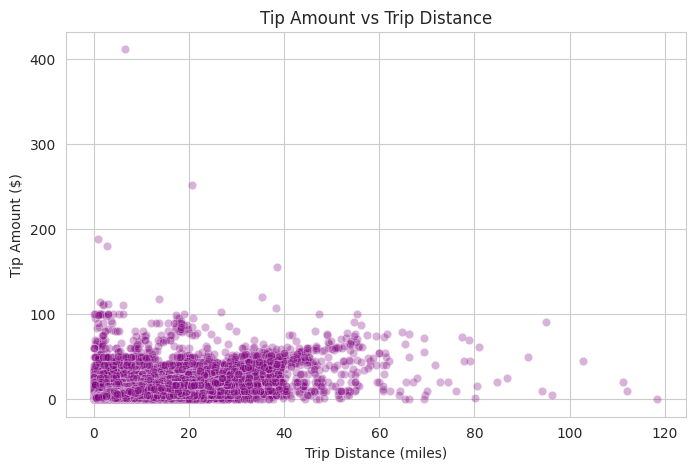

Correlation between tip_amount and trip_distance: 0.802

Correlation Summary:
fare_amount vs trip_duration: 0.321
fare_amount vs passenger_count: 0.038
tip_amount vs trip_distance: 0.802


In [96]:
# Show relationship between tip and trip distance

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_nonzero,
    x='trip_distance',
    y='tip_amount',
    alpha=0.3,
    color='purple'
)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()

# Correlation
corr_tip = df_nonzero['trip_distance'].corr(df_nonzero['tip_amount'])
print(f"Correlation between tip_amount and trip_distance: {corr_tip:.3f}")

print("\nCorrelation Summary:")
print(f"fare_amount vs trip_duration: {corr_duration:.3f}")
print(f"fare_amount vs passenger_count: {corr_passenger:.3f}")
print(f"tip_amount vs trip_distance: {corr_tip:.3f}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

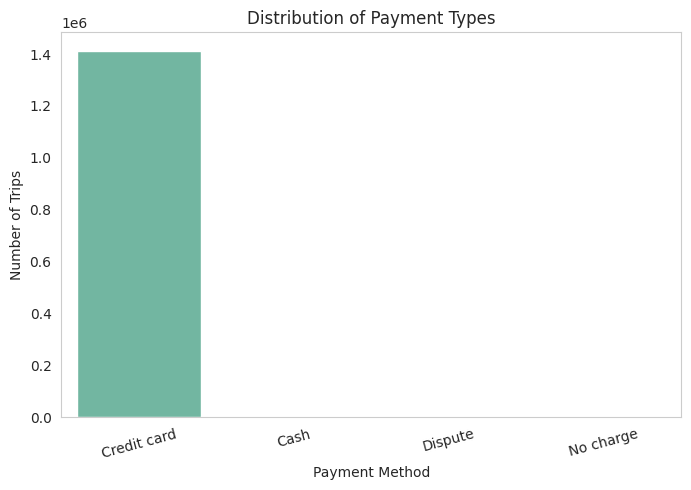

Payment Type Summary:


Count  Percentage (%)
payment_type_label                         
Credit card         1413273           100.0
Cash                     27             0.0
Dispute                  14             0.0
No charge                 4             0.0

In [97]:
# Analyse the distribution of different payment types (payment_type).
# Map numeric payment_type to readable labels
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_labels)


# Plot distribution
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type_label', data=df_nonzero, palette='Set2', order=df_nonzero['payment_type_label'].value_counts().index)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


# Show counts and proportions
payment_counts = df_nonzero['payment_type_label'].value_counts()
payment_percent = (payment_counts / len(df_nonzero)) * 100

payment_summary = pd.DataFrame({
    "Count": payment_counts,
    "Percentage (%)": payment_percent.round(2)
})

print("Payment Type Summary:")
display(payment_summary)




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [98]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [99]:
import geopandas as gpd

# Read the shapefile (only .shp file needed; the rest are used internally)
zones = gpd.read_file("taxi_zones/taxi_zones.shp")

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

Shapefile GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
Shapefile GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   Locatio

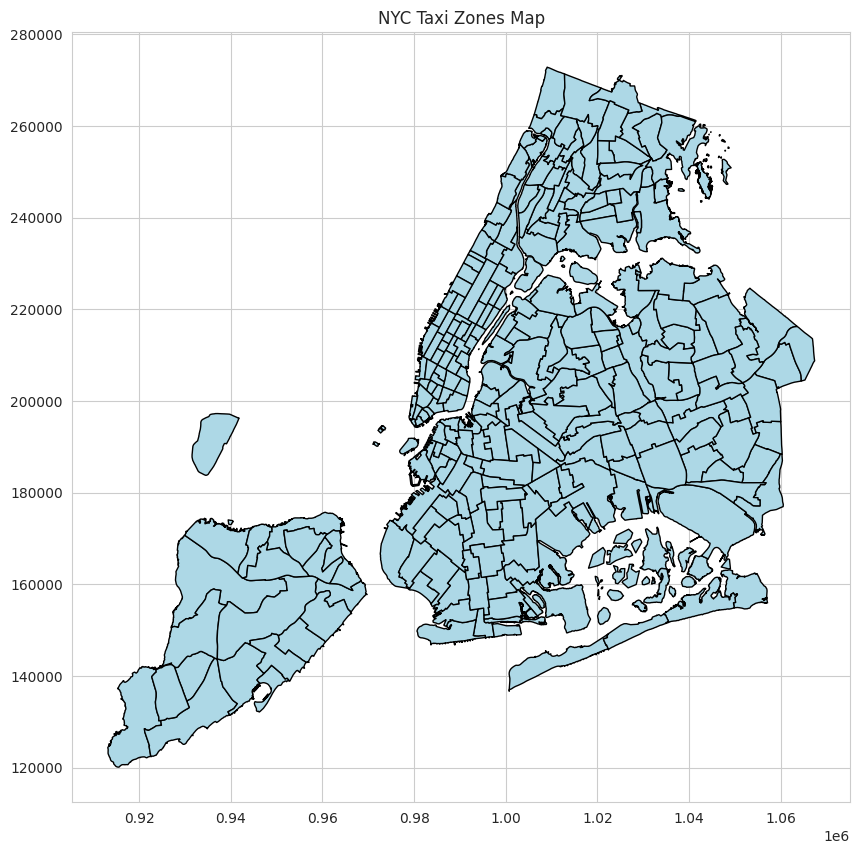

In [100]:
# print(zones.info())
# zones.plot()

# Display info of the zones GeoDataFrame
print("Shapefile GeoDataFrame Info:")
zones.info()

# Display info of the zones GeoDataFrame
print("Shapefile GeoDataFrame Info:")
zones.info()

# Quick plot of NYC taxi zones
zones.plot(figsize=(12, 10), edgecolor='black', color='lightblue')
plt.title("NYC Taxi Zones Map")
plt.show()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [101]:
# Merge zones and trip records using locationID and PULocationID

# Merge zones (GeoDataFrame) into trip records using pickup location
df_pickup_merged = df_nonzero.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

# Rename merged columns to avoid confusion
df_pickup_merged.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
}, inplace=True)

# Drop duplicate LocationID column after merge
df_pickup_merged.drop(columns=['LocationID'], inplace=True)

df_pickup_merged[['PULocationID', 'pickup_zone', 'pickup_borough']].head()


PULocationID            pickup_zone pickup_borough
0           239  Upper West Side South      Manhattan
1           142    Lincoln Square East      Manhattan
2            43           Central Park      Manhattan
3           132            JFK Airport         Queens
4           142    Lincoln Square East      Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [102]:
# Group data by location and calculate the number of trips

# Group by PULocationID and count number of trips
trips_by_location = df_pickup_merged.groupby('PULocationID').size().reset_index(name='trip_count')

# Sort descending by trip count
trips_by_location.sort_values(by='trip_count', ascending=False, inplace=True)

# Display top 10 pickup locations by number of trips
print("Top 10 Pickup Locations by Number of Trips:")
display(trips_by_location.head(10))

# Merge with zones to get readable pickup_zone names
trips_by_location_named = trips_by_location.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
).drop(columns=['LocationID'])

print("Top Pickup Zones by Trip Volume:")
display(trips_by_location_named.head(10))


Top 10 Pickup Locations by Number of Trips:


PULocationID  trip_count
196           237       70067
132           161       67634
106           132       63809
195           236       63469
133           162       52387
112           138       51519
115           142       48873
151           186       48588
189           230       44284
141           170       42837

Top Pickup Zones by Trip Volume:


PULocationID  trip_count                          zone
0           237       70067         Upper East Side South
1           161       67634                Midtown Center
2           132       63809                   JFK Airport
3           236       63469         Upper East Side North
4           162       52387                  Midtown East
5           138       51519             LaGuardia Airport
6           142       48873           Lincoln Square East
7           186       48588  Penn Station/Madison Sq West
8           230       44284     Times Sq/Theatre District
9           170       42837                   Murray Hill

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [103]:
# Merge trip counts back to the zones GeoDataFrame

# Step 1: Merge the grouped trip count data into zones GeoDataFrame
zones_with_trips = zones.merge(
    trips_by_location,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

# Step 2: Fill NaN trip counts (locations with no trips in the sample) with 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

print("GeoDataFrame with trip counts:")
zones_with_trips[['LocationID', 'zone', 'trip_count']].head()



GeoDataFrame with trip counts:


LocationID                     zone  trip_count
0           1           Newark Airport          37
1           2              Jamaica Bay           0
2           3  Allerton/Pelham Gardens           1
3           4            Alphabet City        1402
4           5            Arden Heights           0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

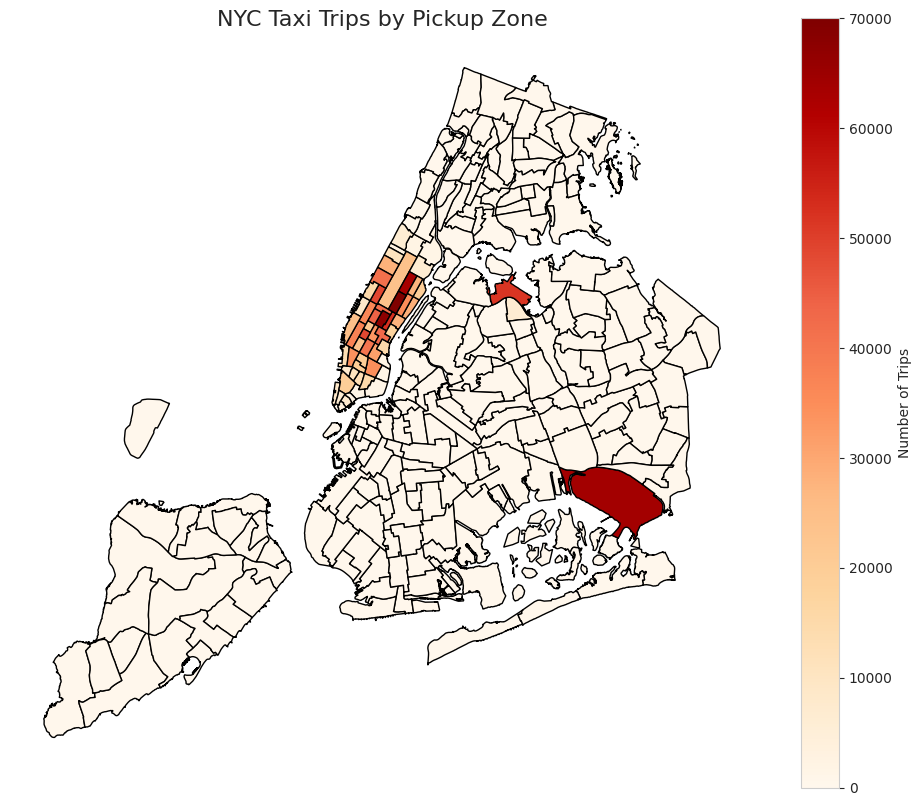

In [104]:
# Define figure and axis

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
# Plot the choropleth map using the trip_count column
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',  # color map
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    edgecolor='black'
)

# Set plot title
plt.title("NYC Taxi Trips by Pickup Zone", fontsize=16)
plt.axis('off')
plt.show()



In [105]:
# can you try displaying the zones DF sorted by the number of trips?

# Display zones sorted by trip count
zones_sorted = zones_with_trips[['LocationID', 'zone', 'borough', 'trip_count']].sort_values(by='trip_count', ascending=False)

print("Top 10 Pickup Zones by Number of Trips:")
display(zones_sorted.head(10))


Top 10 Pickup Zones by Number of Trips:


LocationID                          zone    borough  trip_count
236         237         Upper East Side South  Manhattan       70067
160         161                Midtown Center  Manhattan       67634
131         132                   JFK Airport     Queens       63809
235         236         Upper East Side North  Manhattan       63469
161         162                  Midtown East  Manhattan       52387
137         138             LaGuardia Airport     Queens       51519
141         142           Lincoln Square East  Manhattan       48873
185         186  Penn Station/Madison Sq West  Manhattan       48588
229         230     Times Sq/Theatre District  Manhattan       44284
169         170                   Murray Hill  Manhattan       42837

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [106]:
# Find routes which have the slowest speeds at different times of the day
# Add pickup hour if not already done
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour

# Ensure trip_duration in hours
df_pickup_merged['trip_duration_hr'] = df_pickup_merged['trip_duration'] / 60

# Filter valid speeds (exclude 0-duration trips to avoid division errors)
df_speed = df_pickup_merged[
    (df_pickup_merged['trip_duration_hr'] > 0) &
    (df_pickup_merged['trip_distance'] > 0)
].copy()

# Create route column as: "PickupZone to DropoffZone"
df_speed['route'] = df_speed['pickup_zone'] + " → " + df_speed['DOLocationID'].astype(str)

# Calculate speed (miles per hour)
df_speed['speed_mph'] = df_speed['trip_distance'] / df_speed['trip_duration_hr']

# Group by route and hour to get average speed
slow_routes = df_speed.groupby(['route', 'pickup_hour'])['speed_mph'].mean().reset_index()

# Find slowest 10 routes by speed
slowest_routes = slow_routes.sort_values(by='speed_mph').head(10)

print("Top 10 Slowest Routes by Hour (Lowest Average Speed):")
display(slowest_routes)



Top 10 Slowest Routes by Hour (Lowest Average Speed):


route  pickup_hour  speed_mph
72714                 Seaport → 209           14   0.021423
74951        South Ozone Park → 216            7   0.022234
1638        Battery Park City → 211            0   0.057228
7035                Chinatown → 211           10   0.059607
69222          Newark Airport → 264           11   0.087167
84159      UN/Turtle Bay South → 43           22   0.090693
64067            Midtown North → 89           19   0.110633
90091   Upper West Side North → 100           23   0.125336
32490  Greenwich Village South → 97           14   0.142628
73557                    SoHo → 141            4   0.180757

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

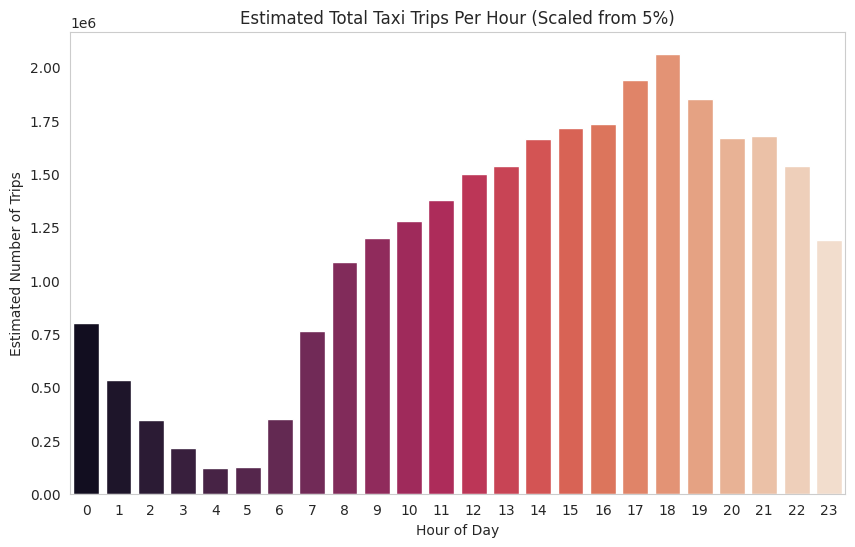

 Busiest Hour: 18:00
 Estimated Trips During That Hour: 2,062,560


In [107]:
# Ensure pickup_hour exists
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour

# Count trips per hour in sampled data
sampled_hourly_counts = df_pickup_merged['pickup_hour'].value_counts().sort_index()

# Scale up by the sampling factor (5% sample  to multiply by 20)
scaling_factor = 20
estimated_hourly_trips = sampled_hourly_counts * scaling_factor

# Plot estimated trip counts per hour
plt.figure(figsize=(10,6))
sns.barplot(x=estimated_hourly_trips.index, y=estimated_hourly_trips.values, palette='rocket')
plt.title("Estimated Total Taxi Trips Per Hour (Scaled from 5%)")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Number of Trips")
plt.grid(axis='y')
plt.xticks(range(24))
plt.show()

# Identify busiest hour
busiest_hour = estimated_hourly_trips.idxmax()
busiest_trips = estimated_hourly_trips.max()
print(f" Busiest Hour: {busiest_hour}:00")
print(f" Estimated Trips During That Hour: {int(busiest_trips):,}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [108]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

scaling_factor = 1 / sample_fraction  # = 20

# Ensure 'pickup_hour' exists
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour

# Count number of sampled trips per hour
sampled_counts = df_pickup_merged['pickup_hour'].value_counts().sort_values(ascending=False)

# Get top 5 busiest hours from the sampled data
top_5_hours = sampled_counts.head(5)

# Scale up to estimate actual trip counts
actual_trip_counts = (top_5_hours * scaling_factor).astype(int)

# Display results
print("Estimated Actual Number of Trips in the 5 Busiest Hours:")
for hour, trips in actual_trip_counts.items():
    print(f"Hour {hour}:00 → {trips:,} trips")


Estimated Actual Number of Trips in the 5 Busiest Hours:
Hour 18:00 → 2,062,560 trips
Hour 17:00 → 1,941,640 trips
Hour 19:00 → 1,851,440 trips
Hour 16:00 → 1,734,260 trips
Hour 15:00 → 1,712,300 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

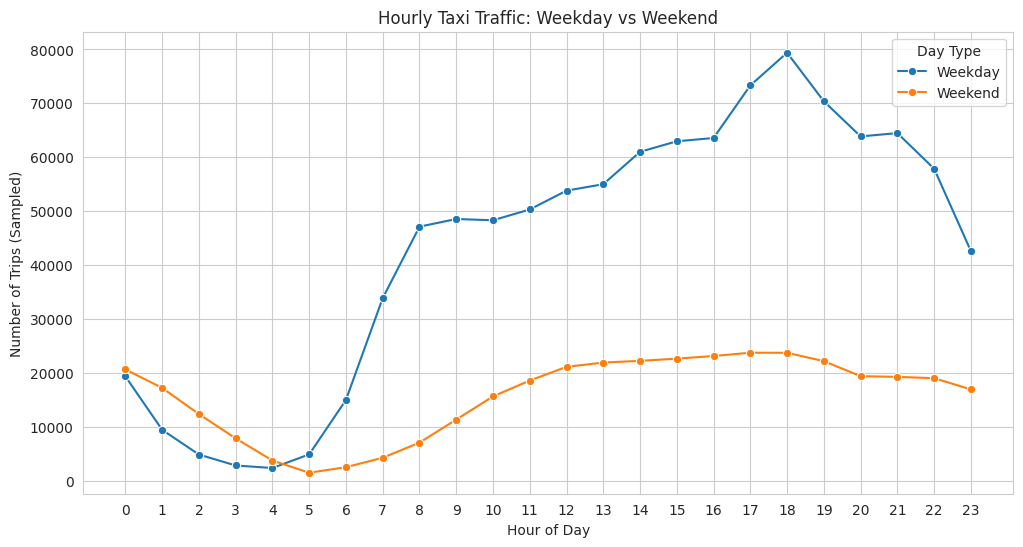

In [109]:
# Compare traffic trends for the week days and weekends
# Ensure datetime is in correct format
df_pickup_merged['tpep_pickup_datetime'] = pd.to_datetime(df_pickup_merged['tpep_pickup_datetime'])

# Extract pickup hour and day of week (0 = Monday, 6 = Sunday)
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour
df_pickup_merged['pickup_dayofweek'] = df_pickup_merged['tpep_pickup_datetime'].dt.dayofweek

# Create a new column for weekday/weekend
df_pickup_merged['day_type'] = df_pickup_merged['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type, then count trips
hourly_traffic = df_pickup_merged.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title("Hourly Taxi Traffic: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips (Sampled)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

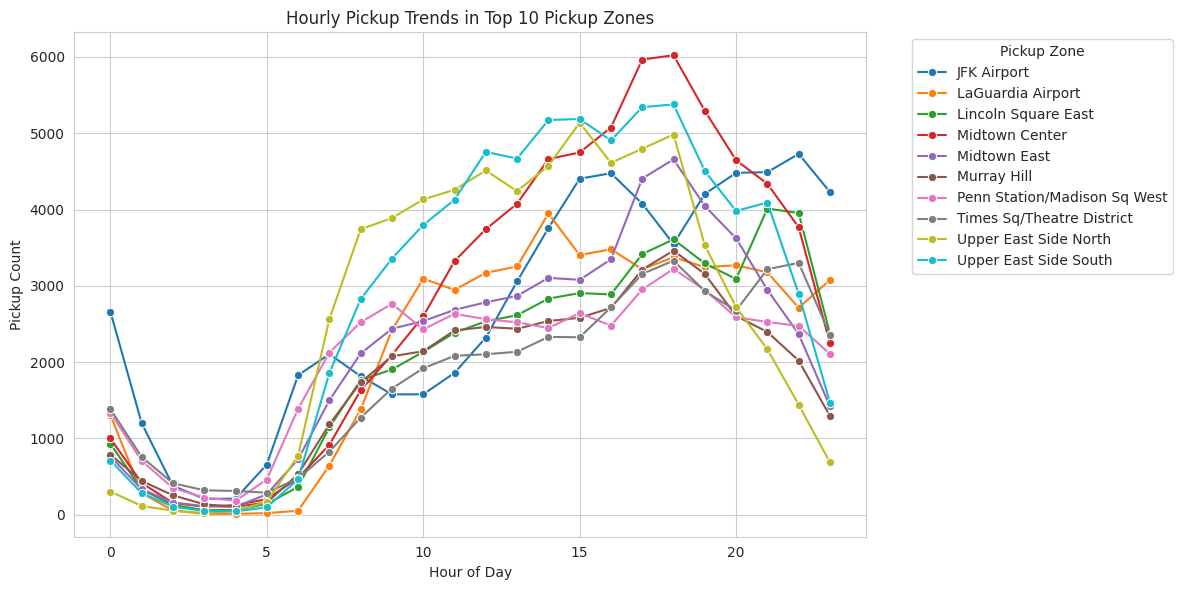

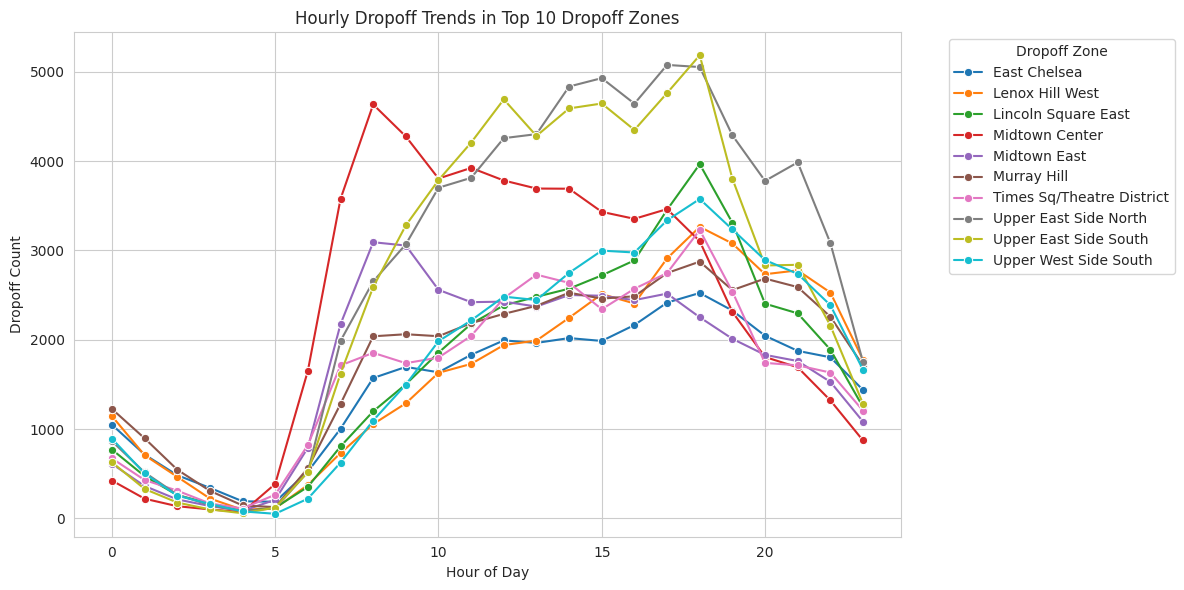

In [110]:
# Find top 10 pickup and dropoff zones
# Merge dropoff zone names from zones GeoDataFrame
df_pickup_merged = df_pickup_merged.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='DOLocationID',
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone'}).drop(columns=['LocationID'])

# Group by pickup zone and hour, then count
pickup_counts = df_pickup_merged.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='pickup_count')

# Sum total pickups per zone
total_pickups = pickup_counts.groupby('pickup_zone')['pickup_count'].sum().reset_index()
top10_pickup_zones = total_pickups.sort_values(by='pickup_count', ascending=False).head(10)

# Group by dropoff zone and hour, then count
dropoff_counts = df_pickup_merged.groupby(['dropoff_zone', 'pickup_hour']).size().reset_index(name='dropoff_count')

# Sum total dropoffs per zone
total_dropoffs = dropoff_counts.groupby('dropoff_zone')['dropoff_count'].sum().reset_index()
top10_dropoff_zones = total_dropoffs.sort_values(by='dropoff_count', ascending=False).head(10)

# Filter hourly pickup data for top 10 zones
pickup_trends = pickup_counts[pickup_counts['pickup_zone'].isin(top10_pickup_zones['pickup_zone'])]

plt.figure(figsize=(12,6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='pickup_count', hue='pickup_zone', marker='o')
plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Count")
plt.grid(True)
plt.legend(title="Pickup Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Filter hourly dropoff data for top 10 zones
dropoff_trends = dropoff_counts[dropoff_counts['dropoff_zone'].isin(top10_dropoff_zones['dropoff_zone'])]

plt.figure(figsize=(12,6))
sns.lineplot(data=dropoff_trends, x='pickup_hour', y='dropoff_count', hue='dropoff_zone', marker='o')
plt.title("Hourly Dropoff Trends in Top 10 Dropoff Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Dropoff Count")
plt.grid(True)
plt.legend(title="Dropoff Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [111]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Total pickups per zone
pickup_zone_counts = df_pickup_merged['pickup_zone'].value_counts().reset_index()
pickup_zone_counts.columns = ['zone', 'pickup_count']

# Total dropoffs per zone
dropoff_zone_counts = df_pickup_merged['dropoff_zone'].value_counts().reset_index()
dropoff_zone_counts.columns = ['zone', 'dropoff_count']

# Merge pickup and dropoff counts
zone_ratios = pd.merge(pickup_zone_counts, dropoff_zone_counts, on='zone', how='outer').fillna(0)

# Avoid division by zero
zone_ratios = zone_ratios[zone_ratios['dropoff_count'] > 0]

# Compute ratio: pickup/dropoff
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count']

# Top 10 zones with highest pickup/dropoff ratio
top10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest pickup/dropoff ratio
bottom10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print(" Top 10 Zones by Pickup/Dropoff Ratio:")
display(top10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n Bottom 10 Zones by Pickup/Dropoff Ratio:")
display(bottom10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])



 Top 10 Zones by Pickup/Dropoff Ratio:


zone  pickup_count  dropoff_count  \
66                  East Elmhurst        6455.0          470.0   
120                   JFK Airport       63856.0        13577.0   
130             LaGuardia Airport       51553.0        17700.0   
179  Penn Station/Madison Sq West       48592.0        29458.0   
105       Greenwich Village South       19820.0        14240.0   
40                   Central Park       23819.0        17344.0   
242                  West Village       34180.0        25662.0   
154                  Midtown East       52389.0        40912.0   
95               Garment District       21433.0        17646.0   
153                Midtown Center       67635.0        55712.0   

     pickup_dropoff_ratio  
66              13.734043  
120              4.703248  
130              2.912599  
179              1.649535  
105              1.391854  
40               1.373328  
242              1.331930  
154              1.280529  
95               1.214610  
153              1.214011


 Bottom 10 Zones by Pickup/Dropoff Ratio:


zone  pickup_count  dropoff_count  \
2                         Arden Heights           0.0            7.0   
27                        Broad Channel           0.0            5.0   
20              Bloomfield/Emerson Hill           0.0           24.0   
29                            Bronxdale           0.0           28.0   
24  Breezy Point/Fort Tilden/Riis Beach           0.0           17.0   
19                     Bensonhurst West           0.0          128.0   
41               Charleston/Tottenville           0.0            9.0   
43                          City Island           0.0           19.0   
54                         Country Club           0.0           23.0   
55                         Crotona Park           0.0            8.0   

    pickup_dropoff_ratio  
2                    0.0  
27                   0.0  
20                   0.0  
29                   0.0  
24                   0.0  
19                   0.0  
41                   0.0  
43                   0.0  
54                   0.0  
55                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [112]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Convert pickup datetime to datetime type (if not already)
df_pickup_merged['tpep_pickup_datetime'] = pd.to_datetime(df_pickup_merged['tpep_pickup_datetime'])

# Extract pickup hour
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour

# Define night hours: 11 PM to 5 AM
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter night-time trips
df_night = df_pickup_merged[df_pickup_merged['pickup_hour'].isin(night_hours)]

# --- TASK 1: Top 10 Night Pickup Zones ---
night_pickups = df_night['pickup_zone'].value_counts().head(10)
night_dropoffs = df_night['dropoff_zone'].value_counts().head(10)

print(" Top 10 Night Pickup Zones (11 PM to 5 AM):")
display(night_pickups)

print(" Top 10 Night Dropoff Zones (11 PM to 5 AM):")
display(night_dropoffs)

# --- TASK 2: Revenue Share — Night vs Day ---

# Total amount for night hours
night_revenue = df_night['total_amount'].sum()

# Filter day-time data
df_day = df_pickup_merged[~df_pickup_merged['pickup_hour'].isin(night_hours)]
day_revenue = df_day['total_amount'].sum()

total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print("\nRevenue Share:")
print(f"Night Hours (11 PM to 5 AM): ${night_revenue:,.2f} → {night_share:.2f}% of total")
print(f"Day Hours (6 AM to 10 PM):   ${day_revenue:,.2f} → {day_share:.2f}% of total")


 Top 10 Night Pickup Zones (11 PM to 5 AM):


pickup_zone
East Village                    12842
West Village                    10557
JFK Airport                      9548
Lower East Side                  7982
Clinton East                     7953
Greenwich Village South          7339
Times Sq/Theatre District        5834
Penn Station/Madison Sq West     5371
Midtown South                    4847
LaGuardia Airport                4767
Name: count, dtype: int64

 Top 10 Night Dropoff Zones (11 PM to 5 AM):


dropoff_zone
East Village                     6765
Clinton East                     5285
Murray Hill                      4953
Gramercy                         4806
Lenox Hill West                  4522
East Chelsea                     4401
Yorkville West                   4363
West Village                     4176
Upper East Side North            3733
Sutton Place/Turtle Bay North    3672
Name: count, dtype: int64


Revenue Share:
Night Hours (11 PM to 5 AM): $4,985,850.10 → 11.92% of total
Day Hours (6 AM to 10 PM):   $36,826,781.41 → 88.08% of total


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [113]:
# Filter for night hours (11 PM to 5 AM)

# Ensure datetime is correct
df_pickup_merged['tpep_pickup_datetime'] = pd.to_datetime(df_pickup_merged['tpep_pickup_datetime'])

# Extract pickup hour
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour

# Define night hours
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night and day trips
df_night = df_pickup_merged[df_pickup_merged['pickup_hour'].isin(night_hours)]
df_day = df_pickup_merged[~df_pickup_merged['pickup_hour'].isin(night_hours)]

# Calculate revenue for both
night_revenue = df_night['total_amount'].sum()
day_revenue = df_day['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate percentage share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print("Revenue Share Breakdown:")
print(f" Nighttime (11 PM – 5 AM): ${night_revenue:,.2f} → {night_share:.2f}%")
print(f" Daytime  (6 AM – 10 PM):  ${day_revenue:,.2f} → {day_share:.2f}%")


Revenue Share Breakdown:
 Nighttime (11 PM – 5 AM): $4,985,850.10 → 11.92%
 Daytime  (6 AM – 10 PM):  $36,826,781.41 → 88.08%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [114]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter to avoid division by zero (trip_distance & passenger_count)
df_valid = df_pickup_merged[
    (df_pickup_merged['trip_distance'] > 0) &
    (df_pickup_merged['passenger_count'] > 0)
].copy()

# Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = (
    df_valid['fare_amount'] / df_valid['trip_distance'] / df_valid['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
fare_per_passenger_summary = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Round for display
fare_per_passenger_summary['fare_per_mile_per_passenger'] = fare_per_passenger_summary['fare_per_mile_per_passenger'].round(2)

# Display results
print(" Average Fare per Mile per Passenger:")
display(fare_per_passenger_summary)



 Average Fare per Mile per Passenger:


passenger_count  fare_per_mile_per_passenger
0              1.0                         9.21
1              2.0                         5.28
2              3.0                         3.49
3              4.0                         4.26
4              5.0                         1.54
5              6.0                         1.37

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

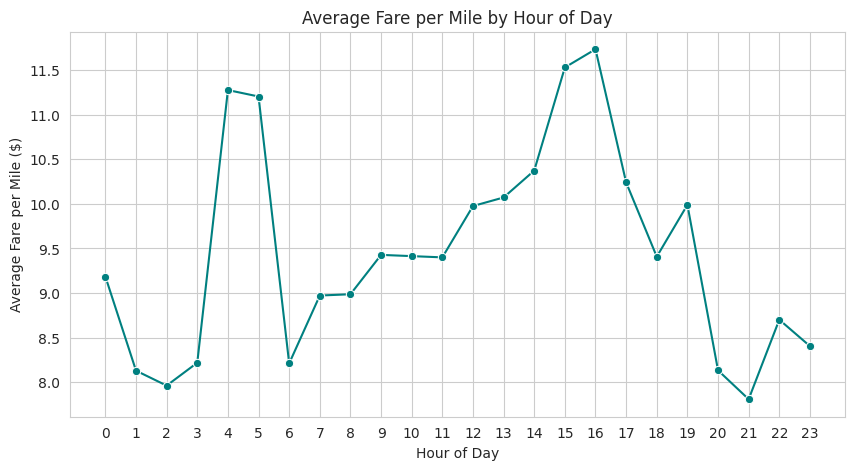

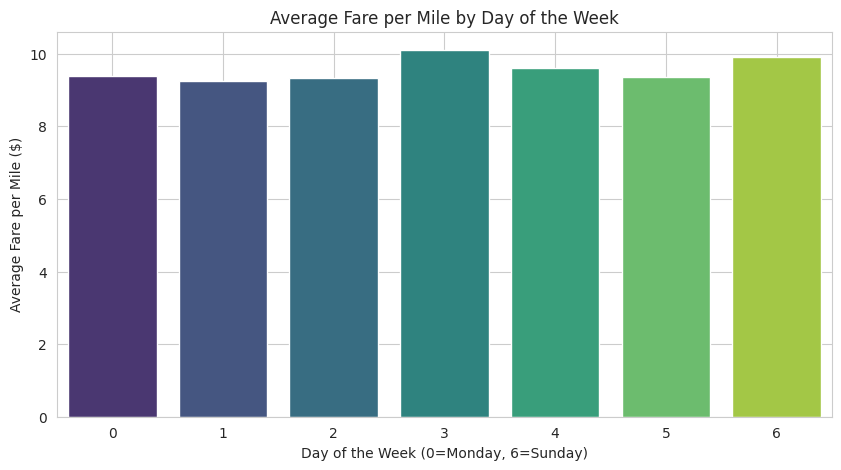

 Average Fare per Mile by Hour:


pickup_hour  fare_per_mile
0             0           9.18
1             1           8.13
2             2           7.96
3             3           8.22
4             4          11.28
5             5          11.20
6             6           8.21
7             7           8.97
8             8           8.99
9             9           9.43
10           10           9.41
11           11           9.40
12           12           9.98
13           13          10.07
14           14          10.37
15           15          11.53
16           16          11.74
17           17          10.24
18           18           9.41
19           19           9.99
20           20           8.13
21           21           7.81
22           22           8.70
23           23           8.40

Average Fare per Mile by Day of the Week:


pickup_dayofweek  fare_per_mile
0                 0           9.37
1                 1           9.26
2                 2           9.34
3                 3          10.10
4                 4           9.59
5                 5           9.37
6                 6           9.90

In [115]:
# Compare the average fare per mile for different days and for different times of the day
# Filter out rows with 0 or negative trip_distance to avoid division by zero
df_valid_fare = df_pickup_merged[df_pickup_merged['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid_fare['fare_per_mile'] = df_valid_fare['fare_amount'] / df_valid_fare['trip_distance']

# Extract hour and day if not already done
df_valid_fare['pickup_hour'] = df_valid_fare['tpep_pickup_datetime'].dt.hour
df_valid_fare['pickup_dayofweek'] = df_valid_fare['tpep_pickup_datetime'].dt.dayofweek

# Group by hour and calculate mean fare per mile
fare_by_hour = df_valid_fare.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', marker='o', color='teal')
plt.title("Average Fare per Mile by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


# Group by day of week and calculate mean fare per mile
fare_by_day = df_valid_fare.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=fare_by_day, x='pickup_dayofweek', y='fare_per_mile', palette='viridis')
plt.title("Average Fare per Mile by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(True)
plt.show()

fare_by_hour['fare_per_mile'] = fare_by_hour['fare_per_mile'].round(2)
fare_by_day['fare_per_mile'] = fare_by_day['fare_per_mile'].round(2)

print(" Average Fare per Mile by Hour:")
display(fare_by_hour)

print( "Average Fare per Mile by Day of the Week:")
display(fare_by_day)



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

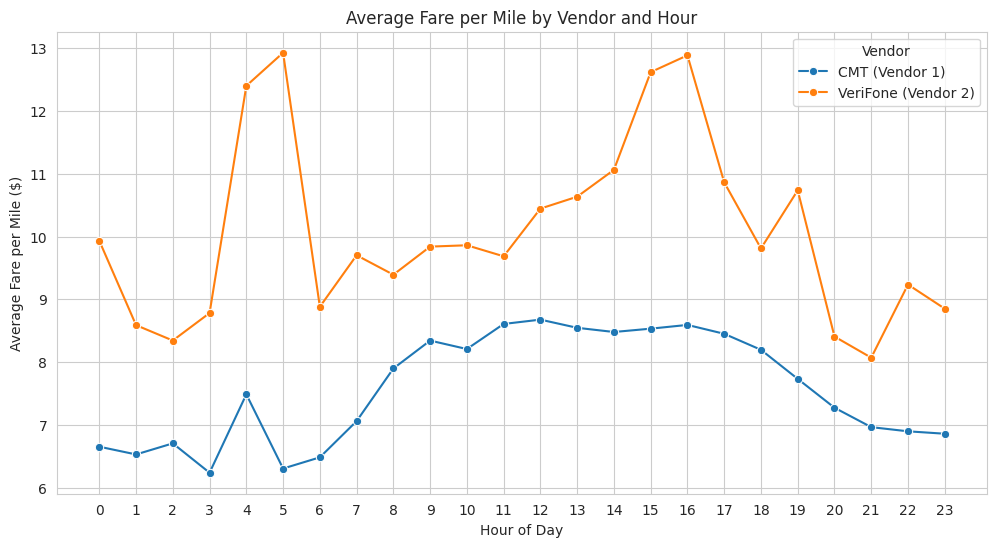

vendor_name  pickup_hour  fare_per_mile
0   CMT (Vendor 1)            0           6.65
1   CMT (Vendor 1)            1           6.53
2   CMT (Vendor 1)            2           6.71
3   CMT (Vendor 1)            3           6.24
4   CMT (Vendor 1)            4           7.49
5   CMT (Vendor 1)            5           6.30
6   CMT (Vendor 1)            6           6.48
7   CMT (Vendor 1)            7           7.06
8   CMT (Vendor 1)            8           7.90
9   CMT (Vendor 1)            9           8.34
10  CMT (Vendor 1)           10           8.21
11  CMT (Vendor 1)           11           8.61
12  CMT (Vendor 1)           12           8.68
13  CMT (Vendor 1)           13           8.55
14  CMT (Vendor 1)           14           8.48
15  CMT (Vendor 1)           15           8.53
16  CMT (Vendor 1)           16           8.59
17  CMT (Vendor 1)           17           8.45
18  CMT (Vendor 1)           18           8.20
19  CMT (Vendor 1)           19           7.73
20  CMT (Vendor 1)           20           7.27
21  CMT (Vendor 1)           21           6.96
22  CMT (Vendor 1)           22           6.90
23  CMT (Vendor 1)           23           6.86

In [116]:
# Compare fare per mile for different vendors
# Filter valid entries (positive trip distance)
df_vendor_fare = df_pickup_merged[df_pickup_merged['trip_distance'] > 0].copy()

# Calculate fare per mile
df_vendor_fare['fare_per_mile'] = df_vendor_fare['fare_amount'] / df_vendor_fare['trip_distance']

# Extract pickup hour (if not already)
df_vendor_fare['pickup_hour'] = df_vendor_fare['tpep_pickup_datetime'].dt.hour

# Optional: Map VendorID to names for readability
vendor_names = {1: "CMT (Vendor 1)", 2: "VeriFone (Vendor 2)"}
df_vendor_fare['vendor_name'] = df_vendor_fare['VendorID'].map(vendor_names)

# Group by vendor and hour, then average
vendor_hourly_fare = df_vendor_fare.groupby(['vendor_name', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=vendor_hourly_fare,
    x='pickup_hour',
    y='fare_per_mile',
    hue='vendor_name',
    marker='o'
)
plt.title("Average Fare per Mile by Vendor and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(True)
plt.legend(title="Vendor")
plt.xticks(range(0, 24))
plt.show()


vendor_hourly_fare['fare_per_mile'] = vendor_hourly_fare['fare_per_mile'].round(2)
display(vendor_hourly_fare.head(24))  # Show 1 day worth of hourly rows



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


 Average Fare per Mile by Vendor and Distance Tier:


vendor_name       distance_tier  fare_per_mile
0       CMT (Vendor 1)  Tier 1 (≤ 2 miles)           9.50
1       CMT (Vendor 1)  Tier 2 (2–5 miles)           6.37
2       CMT (Vendor 1)  Tier 3 (> 5 miles)           4.47
3  VeriFone (Vendor 2)  Tier 1 (≤ 2 miles)          13.79
4  VeriFone (Vendor 2)  Tier 2 (2–5 miles)           6.54
5  VeriFone (Vendor 2)  Tier 3 (> 5 miles)           4.51

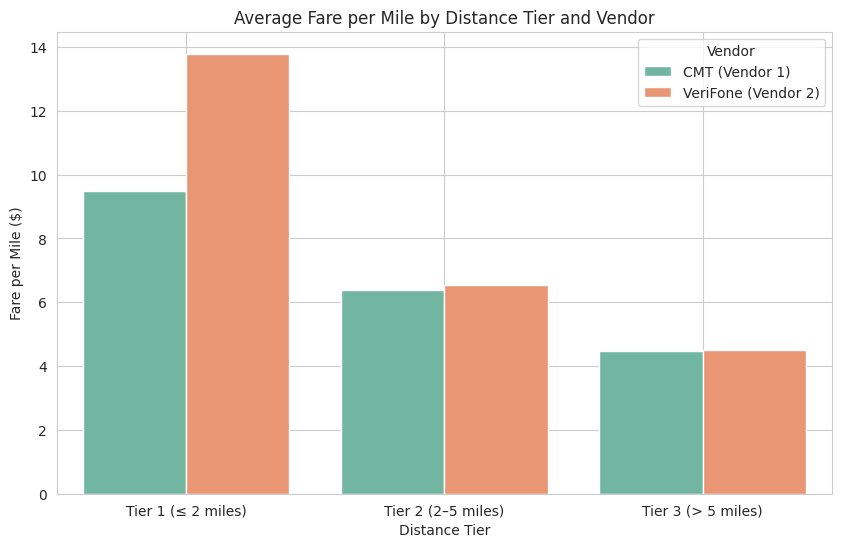

In [117]:
# Defining distance tiers

# Filter out invalid trips
df_tiers = df_pickup_merged[(df_pickup_merged['trip_distance'] > 0) & (df_pickup_merged['fare_amount'] > 0)].copy()

# Compute fare per mile
df_tiers['fare_per_mile'] = df_tiers['fare_amount'] / df_tiers['trip_distance']

# Map vendor names (optional for clarity)
vendor_map = {1: "CMT (Vendor 1)", 2: "VeriFone (Vendor 2)"}
df_tiers['vendor_name'] = df_tiers['VendorID'].map(vendor_map)

# Create tier labels based on trip_distance
def assign_tier(distance):
    if distance <= 2:
        return 'Tier 1 (≤ 2 miles)'
    elif 2 < distance <= 5:
        return 'Tier 2 (2–5 miles)'
    else:
        return 'Tier 3 (> 5 miles)'

df_tiers['distance_tier'] = df_tiers['trip_distance'].apply(assign_tier)

# Group and calculate mean fare per mile for each vendor per tier
tiered_fare_summary = df_tiers.groupby(['vendor_name', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Round results for readability
tiered_fare_summary['fare_per_mile'] = tiered_fare_summary['fare_per_mile'].round(2)

print(" Average Fare per Mile by Vendor and Distance Tier:")
display(tiered_fare_summary)

plt.figure(figsize=(10,6))
sns.barplot(
    data=tiered_fare_summary,
    x='distance_tier',
    y='fare_per_mile',
    hue='vendor_name',
    palette='Set2'
)
plt.title("Average Fare per Mile by Distance Tier and Vendor")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.grid(True)
plt.legend(title="Vendor")
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

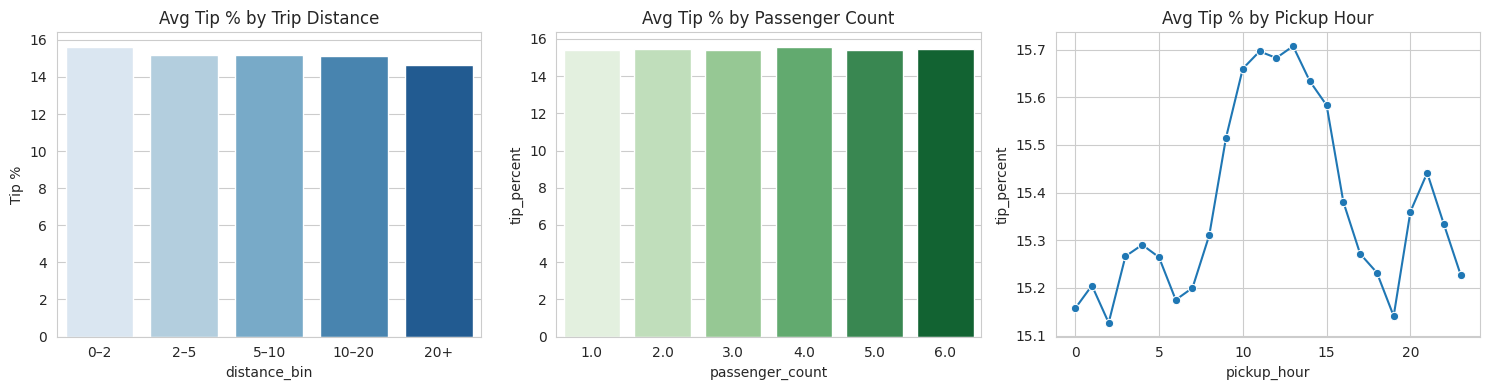

In [118]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Step 1: Calculate tip percentage
df_tips = df_pickup_merged[(df_pickup_merged['total_amount'] > 0)].copy()
df_tips['tip_percent'] = (df_tips['tip_amount'] / df_tips['total_amount']) * 100

# Remove outliers (optional)
df_tips = df_tips[(df_tips['tip_percent'] >= 0) & (df_tips['tip_percent'] <= 100)]

# Bin trip distance
df_tips['distance_bin'] = pd.cut(df_tips['trip_distance'], bins=[0, 2, 5, 10, 20, 100],
                                  labels=['0–2', '2–5', '5–10', '10–20', '20+'])

# 1. Tip % by trip distance
tip_by_distance = df_tips.groupby('distance_bin')['tip_percent'].mean().reset_index()

# 2. Tip % by passenger count
tip_by_passenger = df_tips.groupby('passenger_count')['tip_percent'].mean().reset_index()

# 3. Tip % by pickup hour
df_tips['pickup_hour'] = df_tips['tpep_pickup_datetime'].dt.hour
tip_by_hour = df_tips.groupby('pickup_hour')['tip_percent'].mean().reset_index()

# Plot 1: Tip % vs Distance
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.barplot(x='distance_bin', y='tip_percent', data=tip_by_distance, palette='Blues')
plt.title("Avg Tip % by Trip Distance")
plt.ylabel("Tip %")

# Plot 2: Tip % vs Passenger Count
plt.subplot(1, 3, 2)
sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='Greens')
plt.title("Avg Tip % by Passenger Count")

# Plot 3: Tip % vs Hour
plt.subplot(1, 3, 3)
sns.lineplot(x='pickup_hour', y='tip_percent', data=tip_by_hour, marker='o')
plt.title("Avg Tip % by Pickup Hour")
plt.tight_layout()
plt.show()

# Compare low vs high tipping behavior
low_tips = df_tips[df_tips['tip_percent'] < 10]
high_tips = df_tips[df_tips['tip_percent'] > 25]



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [119]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# Average trip distance, time, and passenger for both
comparison = pd.DataFrame({
    'Group': ['Low Tips (<10%)', 'High Tips (>25%)'],
    'Avg Distance': [low_tips['trip_distance'].mean(), high_tips['trip_distance'].mean()],
    'Avg Passengers': [low_tips['passenger_count'].mean(), high_tips['passenger_count'].mean()],
    'Avg Pickup Hour': [low_tips['pickup_hour'].mean(), high_tips['pickup_hour'].mean()]
})



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

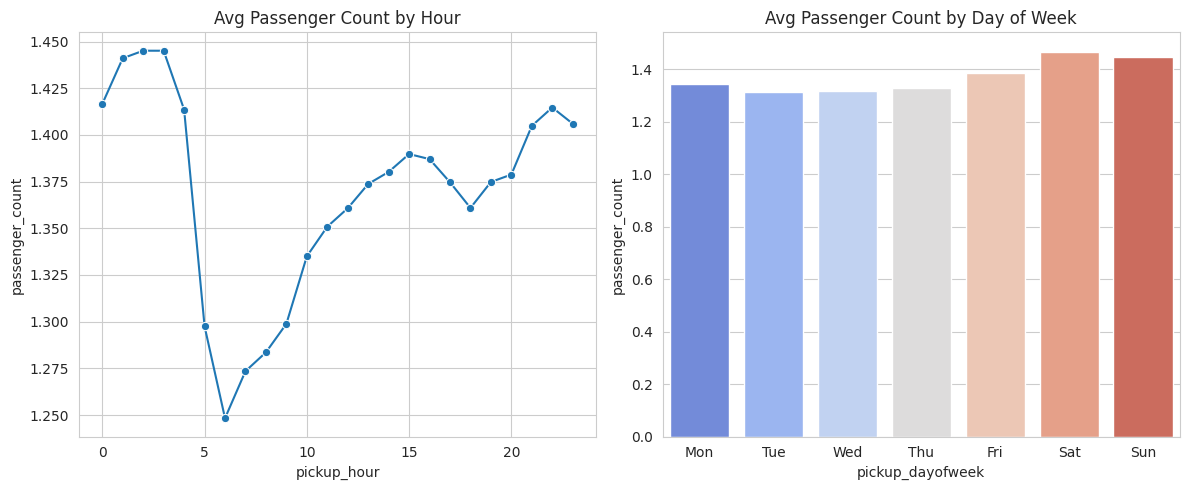

In [120]:
# See how passenger count varies across hours and days

# Extract hour and day
df_passenger = df_pickup_merged.copy()
df_passenger['pickup_hour'] = df_passenger['tpep_pickup_datetime'].dt.hour
df_passenger['pickup_dayofweek'] = df_passenger['tpep_pickup_datetime'].dt.dayofweek

# Avg passengers per hour
hourly_passengers = df_passenger.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Avg passengers per day
daily_passengers = df_passenger.groupby('pickup_dayofweek')['passenger_count'].mean().reset_index()

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x='pickup_hour', y='passenger_count', data=hourly_passengers, marker='o')
plt.title("Avg Passenger Count by Hour")

plt.subplot(1, 2, 2)
sns.barplot(x='pickup_dayofweek', y='passenger_count', data=daily_passengers, palette='coolwarm')
plt.title("Avg Passenger Count by Day of Week")
plt.xticks([0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [121]:
# How does passenger count vary across zones
# Group by pickup zone to get avg passenger count
zone_passengers = df_pickup_merged.groupby('pickup_zone')['passenger_count'].mean().reset_index()




In [122]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Merge with GeoDataFrame
zones_with_trips = zones_with_trips.merge(zone_passengers, how='left', left_on='zone', right_on='pickup_zone')

# Rename for clarity
zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Fill NaN with 0
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

# Display top 10
print(" Top 10 Zones by Avg Passenger Count:")
display(zones_with_trips[['zone', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10))



 Top 10 Zones by Avg Passenger Count:


zone  avg_passenger_count
59                     Crotona Park East             6.000000
181                          Parkchester             4.000000
97                         Fresh Meadows             4.000000
116                      Hammels/Arverne             3.000000
66                         Dyker Heights             2.666667
179                           Ozone Park             2.200000
199  Riverdale/North Riverdale/Fieldston             2.000000
200                        Rockaway Park             2.000000
30                            Bronx Park             2.000000
20                      Bensonhurst East             2.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

 Frequency of Surcharges Being Applied:
extra: 897040 trips → 63.46%
mta_tax: 1405310 trips → 99.42%
tip_amount: 1413484 trips → 100.00%
tolls_amount: 114478 trips → 8.10%
improvement_surcharge: 1413462 trips → 100.00%
congestion_surcharge: 1341049 trips → 94.88%
airport_fee: 116235 trips → 8.22%

 Top 10 Pickup Zones with Congestion Surcharge:


pickup_zone
Upper East Side South           69935
Midtown Center                  67219
Upper East Side North           63204
Midtown East                    52142
Lincoln Square East             48728
Penn Station/Madison Sq West    48352
Times Sq/Theatre District       43614
Murray Hill                     42649
Midtown North                   41470
Upper West Side South           41324
Name: count, dtype: int64

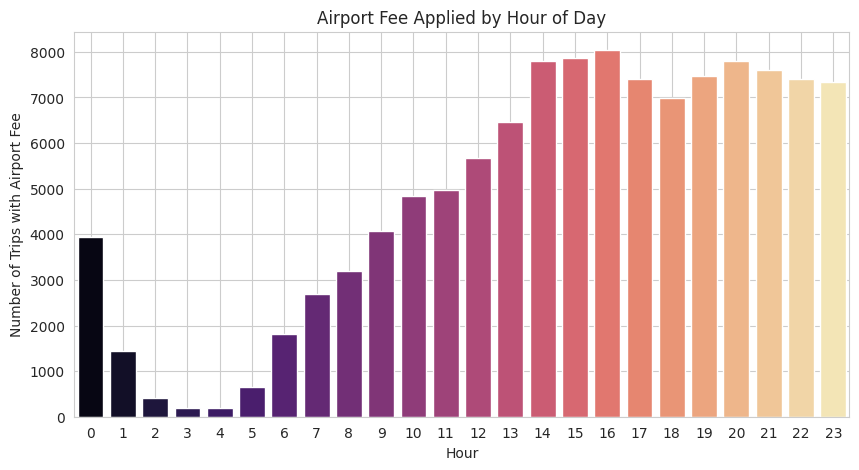

In [123]:
# How often is each surcharge applied?

# List of surcharge columns to analyze
surcharge_cols = [
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
]

# Count how many times each surcharge is non-zero
print(" Frequency of Surcharges Being Applied:")
for col in surcharge_cols:
    applied = (df_pickup_merged[col] > 0).sum()
    pct = (applied / len(df_pickup_merged)) * 100
    print(f"{col}: {applied} trips → {pct:.2f}%")

# Optional: Top zones where congestion_surcharge is applied
cong_df = df_pickup_merged[df_pickup_merged['congestion_surcharge'] > 0]
top_congestion_zones = cong_df['pickup_zone'].value_counts().head(10)

print("\n Top 10 Pickup Zones with Congestion Surcharge:")
display(top_congestion_zones)

# Optional: Times where airport fee is charged
airport_fee_hours = df_pickup_merged[df_pickup_merged['airport_fee'] > 0]['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=airport_fee_hours.index, y=airport_fee_hours.values, palette='magma')
plt.title("Airport Fee Applied by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Trips with Airport Fee")
plt.grid(True)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [124]:
# Ensure datetime format
df_pickup_merged['tpep_pickup_datetime'] = pd.to_datetime(df_pickup_merged['tpep_pickup_datetime'])
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour
df_pickup_merged['pickup_dayofweek'] = df_pickup_merged['tpep_pickup_datetime'].dt.dayofweek

#  1. Identify Slow Routes (Inefficiencies)
df_speed = df_pickup_merged.copy()
df_speed['trip_duration_hr'] = df_speed['trip_duration'] / 60

# Remove invalid entries
df_speed = df_speed[
    (df_speed['trip_distance'] > 0) &
    (df_speed['trip_duration_hr'] > 0)
].copy()

# Create route label
df_speed['route'] = df_speed['pickup_zone'] + " → " + df_speed['dropoff_zone']

# Calculate speed (mph)
df_speed['speed_mph'] = df_speed['trip_distance'] / df_speed['trip_duration_hr']

# Group by route and hour
slow_routes = df_speed.groupby(['route', 'pickup_hour'])['speed_mph'].mean().reset_index()

# Filter slowest (<5 mph) and display top 10
slowest_routes = slow_routes[slow_routes['speed_mph'] < 5].sort_values(by='speed_mph').head(10)
print(" Top 10 Slowest Routes by Hour (Speed < 5 mph):")
display(slowest_routes)

# Top Pickup Zones by Hour (High Demand)
pickup_demand = df_pickup_merged.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='pickup_count')
top_demand_zones = pickup_demand.sort_values(by='pickup_count', ascending=False).head(10)
print(" Top 10 Pickup Zones and Hours with Highest Demand:")
display(top_demand_zones)

# Zones with High Avg Passenger Count (Pooling Potential)
passenger_avg = df_pickup_merged.groupby(['pickup_zone', 'pickup_hour'])['passenger_count'].mean().reset_index()
high_passenger_zones = passenger_avg.sort_values(by='passenger_count', ascending=False).head(10)
print(" Zones with Highest Average Passenger Count:")
display(high_passenger_zones)

#  4. Tier-Based Pricing Strategy
def distance_tier(d):
    if d <= 2:
        return 'Tier 1 (≤2 mi)'
    elif d <= 5:
        return 'Tier 2 (2–5 mi)'
    else:
        return 'Tier 3 (>5 mi)'

df_pricing = df_pickup_merged[df_pickup_merged['trip_distance'] > 0].copy()
df_pricing['fare_per_mile'] = df_pricing['fare_amount'] / df_pricing['trip_distance']
df_pricing['distance_tier'] = df_pricing['trip_distance'].apply(distance_tier)

tier_pricing = df_pricing.groupby('distance_tier')['fare_per_mile'].mean().reset_index().sort_values(by='distance_tier')
tier_pricing['fare_per_mile'] = tier_pricing['fare_per_mile'].round(2)

print(" Average Fare per Mile by Distance Tier:")
display(tier_pricing)


 Top 10 Slowest Routes by Hour (Speed < 5 mph):


route  pickup_hour  \
71916                                  Seaport → Seaport           14   
73868                South Ozone Park → South Ozone Park            7   
1960                            Battery Park City → SoHo            0   
7172                                    Chinatown → SoHo           10   
81755                 UN/Turtle Bay South → Central Park           22   
61816               Midtown North → Flatbush/Ditmas Park           19   
89090           Upper West Side North → Garment District           23   
30873              Greenwich Village South → Fort Greene           14   
72899                             SoHo → Lenox Hill West            4   
69730  Penn Station/Madison Sq West → Long Island Cit...           19   

       speed_mph  
71916   0.021423  
73868   0.022234  
1960    0.057228  
7172    0.059607  
81755   0.090693  
61816   0.110633  
89090   0.125336  
30873   0.142628  
72899   0.180757  
69730   0.198674

 Top 10 Pickup Zones and Hours with Highest Demand:


pickup_zone  pickup_hour  pickup_count
1721         Midtown Center           18          6022
1720         Midtown Center           17          5966
2580  Upper East Side South           18          5377
2579  Upper East Side South           17          5342
1722         Midtown Center           19          5294
2577  Upper East Side South           15          5187
2576  Upper East Side South           14          5173
2553  Upper East Side North           15          5138
1719         Midtown Center           16          5075
2556  Upper East Side North           18          4983

 Zones with Highest Average Passenger Count:


pickup_zone  pickup_hour  passenger_count
1874               Newark Airport           12              6.0
609   Downtown Brooklyn/MetroTech            3              6.0
544             Crotona Park East           18              6.0
566           Crown Heights South            3              6.0
2378             Sunset Park West            3              6.0
136                       Bedford            3              6.0
300                      Canarsie           16              5.0
1827       Mott Haven/Port Morris            5              5.0
306               Carroll Gardens            2              5.0
2292   Spuyten Duyvil/Kingsbridge           19              5.0

 Average Fare per Mile by Distance Tier:


distance_tier  fare_per_mile
0   Tier 1 (≤2 mi)          12.63
1  Tier 2 (2–5 mi)           6.50
2   Tier 3 (>5 mi)           4.50

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [125]:
# Ensure datetime formats
df_pickup_merged['tpep_pickup_datetime'] = pd.to_datetime(df_pickup_merged['tpep_pickup_datetime'])
df_pickup_merged['pickup_hour'] = df_pickup_merged['tpep_pickup_datetime'].dt.hour
df_pickup_merged['pickup_dayofweek'] = df_pickup_merged['tpep_pickup_datetime'].dt.dayofweek
df_pickup_merged['pickup_month'] = df_pickup_merged['tpep_pickup_datetime'].dt.month

#  1. Hourly Pickup Volume by Zone
pickup_by_zone_hour = df_pickup_merged.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='pickup_count')

# Top 10 zone-hour combinations with highest demand
top_zone_hours = pickup_by_zone_hour.sort_values(by='pickup_count', ascending=False).head(10)
print(" Top 10 Zones with Highest Hourly Pickup Demand:")
display(top_zone_hours)

#  2. Weekly Pickup Patterns by Zone
pickup_by_zone_day = df_pickup_merged.groupby(['pickup_zone', 'pickup_dayofweek']).size().reset_index(name='pickup_count')

# Top 10 zone-day combinations
top_zone_days = pickup_by_zone_day.sort_values(by='pickup_count', ascending=False).head(10)
print(" Top 10 Zones with Highest Pickup Demand by Day of Week:")
display(top_zone_days)

#  3. Monthly Demand Seasonality
pickup_by_zone_month = df_pickup_merged.groupby(['pickup_zone', 'pickup_month']).size().reset_index(name='pickup_count')

# Top 10 zone-month combinations
top_zone_months = pickup_by_zone_month.sort_values(by='pickup_count', ascending=False).head(10)
print(" Top 10 Zones with Highest Monthly Demand:")
display(top_zone_months)

#  4. Supply-Demand Imbalance: Pickup vs Dropoff
pickup_counts = df_pickup_merged['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

dropoff_counts = df_pickup_merged['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

zone_flow = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)
zone_flow['pickup_dropoff_diff'] = zone_flow['pickup_count'] - zone_flow['dropoff_count']

# Top zones with pickup > dropoff (likely to face cab shortage)
zones_needing_supply = zone_flow.sort_values(by='pickup_dropoff_diff', ascending=False).head(10)

# Zones with dropoff > pickup (likely to have idle cabs)
zones_with_idle = zone_flow.sort_values(by='pickup_dropoff_diff', ascending=True).head(10)

print(" Zones Likely Facing Cab Shortage (High Pickup > Dropoff):")
display(zones_needing_supply)

print(" Zones Likely to Have Idle Cabs (High Dropoff > Pickup):")
display(zones_with_idle)


 Top 10 Zones with Highest Hourly Pickup Demand:


pickup_zone  pickup_hour  pickup_count
1721         Midtown Center           18          6022
1720         Midtown Center           17          5966
2580  Upper East Side South           18          5377
2579  Upper East Side South           17          5342
1722         Midtown Center           19          5294
2577  Upper East Side South           15          5187
2576  Upper East Side South           14          5173
2553  Upper East Side North           15          5138
1719         Midtown Center           16          5075
2556  Upper East Side North           18          4983

 Top 10 Zones with Highest Pickup Demand by Day of Week:


pickup_zone  pickup_dayofweek  pickup_count
637         Midtown Center                 2         12709
638         Midtown Center                 3         12351
969  Upper East Side South                 2         12351
970  Upper East Side South                 3         12331
636         Midtown Center                 1         11845
968  Upper East Side South                 1         11796
963  Upper East Side North                 3         10858
481            JFK Airport                 6         10834
475            JFK Airport                 0         10767
962  Upper East Side North                 2         10764

 Top 10 Zones with Highest Monthly Demand:


pickup_zone  pickup_month  pickup_count
1499  Upper East Side South             5          7059
1505  Upper East Side South            11          6688
1504  Upper East Side South            10          6589
1506  Upper East Side South            12          6442
991          Midtown Center            10          6428
992          Midtown Center            11          6361
984          Midtown Center             3          6263
986          Midtown Center             5          6145
1500  Upper East Side South             6          6084
1487  Upper East Side North             5          6033

 Zones Likely Facing Cab Shortage (High Pickup > Dropoff):


zone  pickup_count  dropoff_count  \
120                   JFK Airport       63856.0        13577.0   
130             LaGuardia Airport       51553.0        17700.0   
179  Penn Station/Madison Sq West       48592.0        29458.0   
153                Midtown Center       67635.0        55712.0   
154                  Midtown East       52389.0        40912.0   
242                  West Village       34180.0        25662.0   
134           Lincoln Square East       48873.0        41359.0   
230         Upper East Side South       70069.0        62821.0   
155                 Midtown North       41816.0        34795.0   
40                   Central Park       23819.0        17344.0   

     pickup_dropoff_diff  
120              50279.0  
130              33853.0  
179              19134.0  
153              11923.0  
154              11477.0  
242               8518.0  
134               7514.0  
230               7248.0  
155               7021.0  
40                6475.0

 Zones Likely to Have Idle Cabs (High Dropoff > Pickup):


zone  pickup_count  dropoff_count  pickup_dropoff_diff
71         East Harlem South        6407.0        14926.0              -8519.0
135      Lincoln Square West       15045.0        22666.0              -7621.0
47              Clinton West        8491.0        15195.0              -6704.0
70         East Harlem North        1604.0         7748.0              -6144.0
38            Central Harlem        2052.0         7655.0              -5603.0
231    Upper West Side North       27958.0        33372.0              -5414.0
225  Two Bridges/Seward Park        1334.0         6120.0              -4786.0
226      UN/Turtle Bay South       17680.0        22315.0              -4635.0
133          Lenox Hill West       35193.0        39706.0              -4513.0
229    Upper East Side North       63470.0        67696.0              -4226.0

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [126]:
# Ensure valid values
df_price = df_pickup_merged.copy()
df_price = df_price[
    (df_price['trip_distance'] > 0) &
    (df_price['fare_amount'] > 0) &
    (df_price['passenger_count'] > 0)
].copy()

# Extract hour
df_price['pickup_hour'] = df_price['tpep_pickup_datetime'].dt.hour

# 1. Fare per mile & distance tier
df_price['fare_per_mile'] = df_price['fare_amount'] / df_price['trip_distance']

def distance_tier(d):
    if d <= 2:
        return 'Tier 1 (≤2 mi)'
    elif d <= 5:
        return 'Tier 2 (2–5 mi)'
    else:
        return 'Tier 3 (>5 mi)'

df_price['distance_tier'] = df_price['trip_distance'].apply(distance_tier)

tier_pricing = df_price.groupby('distance_tier')['fare_per_mile'].mean().reset_index()

# 2. Fare per passenger
df_price['fare_per_passenger'] = df_price['fare_amount'] / df_price['passenger_count']
fare_per_passenger = df_price.groupby('passenger_count')['fare_per_passenger'].mean().reset_index()

# 3. Hourly fare trend
hourly_fare = df_price.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# 4. Tip percentage
df_price['tip_percent'] = (df_price['tip_amount'] / df_price['total_amount']) * 100
df_price = df_price[df_price['tip_percent'].between(0, 100)]

tip_by_tier = df_price.groupby('distance_tier')['tip_percent'].mean().reset_index()

# 5. Vendor comparison
vendor_map = {1: 'Vendor 1 (CMT)', 2: 'Vendor 2 (VeriFone)'}
df_price['vendor'] = df_price['VendorID'].map(vendor_map)
vendor_fare = df_price.groupby('vendor')['fare_per_mile'].mean().reset_index()

# DISPLAY FINDINGS
print(" Avg Fare per Mile by Distance Tier:")
display(tier_pricing)

print(" Avg Fare per Passenger:")
display(fare_per_passenger)

print(" Hourly Avg Fare per Mile:")
display(hourly_fare)

print("Avg Tip % by Distance Tier:")
display(tip_by_tier)

print(" Avg Fare per Mile by Vendor:")
display(vendor_fare)


 Avg Fare per Mile by Distance Tier:


distance_tier  fare_per_mile
0   Tier 1 (≤2 mi)      12.634781
1  Tier 2 (2–5 mi)       6.501291
2   Tier 3 (>5 mi)       4.501016

 Avg Fare per Passenger:


passenger_count  fare_per_passenger
0              1.0           18.798963
1              2.0           10.808259
2              3.0            6.962332
3              4.0            5.657412
4              5.0            3.764521
5              6.0            3.135016

 Hourly Avg Fare per Mile:


pickup_hour  fare_per_mile
0             0       9.184075
1             1       8.128278
2             2       7.960621
3             3       8.217420
4             4      11.277282
5             5      11.204886
6             6       8.209582
7             7       8.971403
8             8       8.985793
9             9       9.427621
10           10       9.413614
11           11       9.399689
12           12       9.975681
13           13      10.071906
14           14      10.373516
15           15      11.530937
16           16      11.735453
17           17      10.240528
18           18       9.407450
19           19       9.989480
20           20       8.131712
21           21       7.807857
22           22       8.700228
23           23       8.403897

Avg Tip % by Distance Tier:


distance_tier  tip_percent
0   Tier 1 (≤2 mi)    15.625160
1  Tier 2 (2–5 mi)    15.162203
2   Tier 3 (>5 mi)    15.111431

 Avg Fare per Mile by Vendor:


vendor  fare_per_mile
0       Vendor 1 (CMT)       7.914774
1  Vendor 2 (VeriFone)      10.129529